In [1]:
from vcat import ImageData, ImageCube

#set important parameters
useDIFMAP=True

2025-09-07 21:15:27,012 - INFO - vcat - Logging initialized. Log file: Console only.
2025-09-07 21:15:27,013 - INFO - vcat - No environment variable VCAT_CONFIG found, will use defaults.
2025-09-07 21:15:27,014 - INFO - vcat - Using DIFMAP path: /usr/local/difmap/uvf_difmap_2.5g/


Thank you for using VCAT. Have fun with VLBI!
If you are using this package please cite VCAT Team et al. 2025 ....


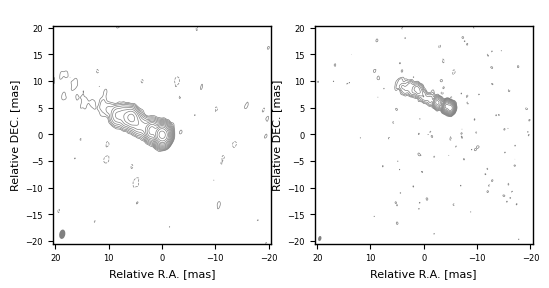

In [2]:
#This notebook aims to explain the different alignment methods that are possible with the VCAT package

#We will start with two images:
#This is a U-band image which was already shifted by -5,5 manually
data_shifted=ImageData("../dataset_example/3C111_U_shifted/3C111_2014-05-08_15GHz.fits",
        uvf_file="../dataset_example/3C111_U_shifted/3C111_2014-05-08_15GHz.uvf")

#The second dataset is a regular X band image
dataX=ImageData("../dataset_example/3C111_X_2014_05_08/3C111_X_2014_05_08.fits",
        uvf_file="../dataset_example/3C111_X_2014_05_08/3C111_X_2014_05_08.uvf")


#Lets'plot both datasets as an ImageCube to have a look
im_cube=ImageCube([data_shifted,dataX])
im_cube.plot()

2025-09-07 21:15:35,943 - INFO - vcat - Automatically regridding image to minimum pixelsize, smallest FOV and common beam
2025-09-07 21:15:36,834 - INFO - vcat - common beam calculated: [1.7770593660568255, 1.1265451854188613, -10.920121192749493]
2025-09-07 21:15:47,822 - INFO - vcat - will apply shift (x,y): [4.28000001011685 : -5.32000001257515] mas


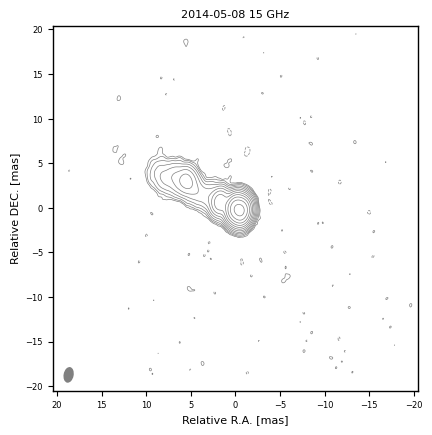

In [3]:
#We will now try to align the shifted image to the second (unshifted) dataset

#we will use the cross-correlation method
method="cross_correlation" #(default setting)

#And we will also let the code determine a common pixel grid and common beam
auto_regrid=True

#Let's start the alignment, this will align data_shifted -> dataX
data_aligned=data_shifted.align(dataX,method=method,auto_regrid=auto_regrid,useDIFMAP=useDIFMAP)

#And plot the resulting image which is shifted and convolved with the common beam
data_aligned.plot()

2025-09-07 21:16:00,473 - INFO - vcat - Automatically regridding image to minimum pixelsize, smallest FOV and common beam
2025-09-07 21:16:01,476 - INFO - vcat - common beam calculated: [1.7770593660568255, 1.1265451854188613, -10.920121192749493]
2025-09-07 21:16:12,420 - INFO - vcat - will apply shift (x,y): [5.08000001200785 : -4.68000001106235] mas


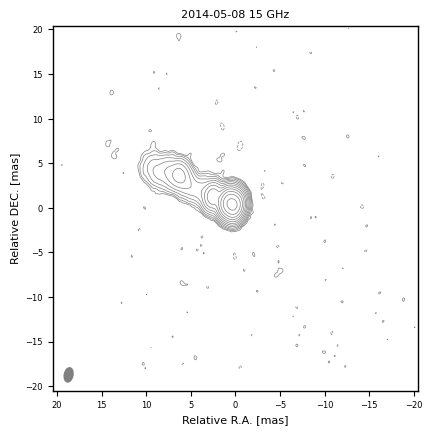

In [4]:
#Instead of using a 2d cross correlation, we can also align the images on the brightest pixel
#Let's load the data again from scratch (this is needed because align() also affects the image that it is called on

#This is a U-band image which was already shifted by -5,5 manually
data_shifted=ImageData("../dataset_example/3C111_U_shifted/3C111_2014-05-08_15GHz.fits",
        uvf_file="../dataset_example/3C111_U_shifted/3C111_2014-05-08_15GHz.uvf")

#The second dataset is a regular X band image
dataX=ImageData("../dataset_example/3C111_X_2014_05_08/3C111_X_2014_05_08.fits",
        uvf_file="../dataset_example/3C111_X_2014_05_08/3C111_X_2014_05_08.uvf")

#This time we will use the 'brightest' method
method="brightest" #align on brightest pixel

#And we will also let the code determine a common pixel grid and common beam
auto_regrid=True

#Let's start the alignment
data_aligned=data_shifted.align(dataX,method=method,auto_regrid=auto_regrid,useDIFMAP=useDIFMAP)

#And plot the resulting image which is shifted and convolved with the common beam
data_aligned.plot()

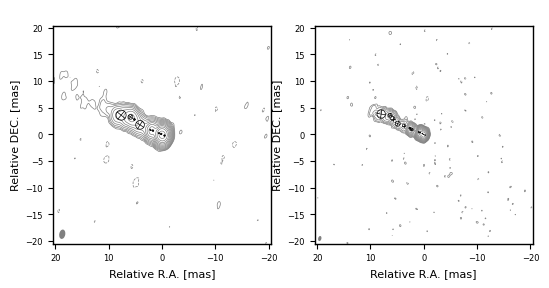

In [5]:
#The third option is to align the images based on modelfit components
#This requires to identify matching components between images first

#First let's load some new data again, this time including modelcomponents
#This is now the regular U-band data
dataU=ImageData("../dataset_example/3C111_U_2014_05_08/3C111_U_2014_05_08.fits",
        model="../dataset_example/3C111_U_2014_05_08/3C111_U_2014_05_08.mfit", #can be modelfits .fits or .mod file
        stokes_q="../dataset_example/3C111_U_2014_05_08/3C111_U_2014_05_08.qcln", #load polarization as well, we need it later
        stokes_u="../dataset_example/3C111_U_2014_05_08/3C111_U_2014_05_08.ucln", #load polarization as well, we need it later
        uvf_file="../dataset_example/3C111_U_2014_05_08/3C111_U_2014_05_08.uvf")

#The second dataset is a regular X band image
dataX=ImageData("../dataset_example/3C111_X_2014_05_08/3C111_X_2014_05_08.fits",
                model="../dataset_example/3C111_X_2014_05_08/3C111_X_2014_05_08.mfit", #can be modelfits .fits or .mod file
                stokes_q="../dataset_example/3C111_X_2014_05_08/3C111_X_2014_05_08.qcln", #load polarization as well, we need it later
                stokes_u="../dataset_example/3C111_X_2014_05_08/3C111_X_2014_05_08.ucln", #load polarization as well, we need it later
                uvf_file="../dataset_example/3C111_X_2014_05_08/3C111_X_2014_05_08.uvf")

#let's look at the data with modelfits displayed
#Lets'plot both datasets as an ImageCube to have a look
im_cube=ImageCube([dataU,dataX])
im_cube.plot(plot_model=True)

2025-09-07 21:17:29,414 - INFO - vcat - will apply shift (x,y): [0.4203553089610068 : 0.3185233708791202] mas


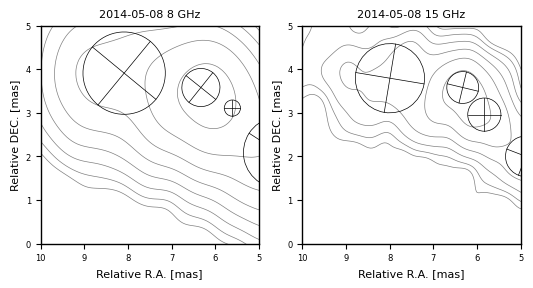

2.221045178885106e-06 1.0535234196140664e-06
2.2463177629106212e-06 1.0858525456569623e-06


In [6]:
#At the next stage, we need to identify model components with each other
#Let's say we want to identify the two largest components with id 1
#We can do this as follows:

import numpy as np

#get the components
comp1=dataU.components
comps2=dataX.components


#find largest component in both images
majs1=[]
for comp in comp1:
    majs1.append(comp.maj)

majs2=[]
for comp in comps2:
    majs2.append(comp.maj)

argmax1=np.argmax(majs1)
argmax2=np.argmax(majs2)

#assign the largest component the component number 1
dataU.components[argmax1].component_number=1
dataX.components[argmax2].component_number=1

#Now we can use this component to align both images 
#Let's start the alignment
method="modelcomp"
comp_ids=1 #you can also use a list of comp_ids, if you have assigned multiple components, then the final shift will be the mean from all component shifts


#do the alignment, no regridding or beam convolution is needed, in principle
dataX_aligned=dataX.align(dataU,method=method,comp_ids=comp_ids,useDIFMAP=useDIFMAP)

#Let's plot the images again and zoom in close to the largest component to check the alignment
im_cube=ImageCube([dataU,dataX_aligned])
im_cube.plot(xlim=[10,5],ylim=[0,5],plot_model=True,plot_beam=False,title="")

#the component is now at the same position as the other component, we can also print their coordinates
print(dataU.components[argmax1].x,dataU.components[argmax1].y)
print(dataX_aligned.components[argmax2].x,dataX_aligned.components[argmax2].y)

2025-09-07 21:18:09,887 - INFO - vcat - Determining common beam...
2025-09-07 21:18:10,791 - INFO - vcat - common beam calculated: [1.7770593660568261, 1.1265451854188584, -10.920121192749422]
2025-09-07 21:18:10,791 - INFO - vcat - Restoring images
Processing: 100%|█████████████████████████████████| 2/2 [01:23<00:00, 41.90s/it]
2025-09-07 21:19:34,604 - INFO - vcat - Image modifications completed.
2025-09-07 21:19:34,622 - INFO - vcat - Spectral index max(alpha)=2.075969934463501 - min(alpha)=-2.75219988822937
Cutoff -3<alpha<5


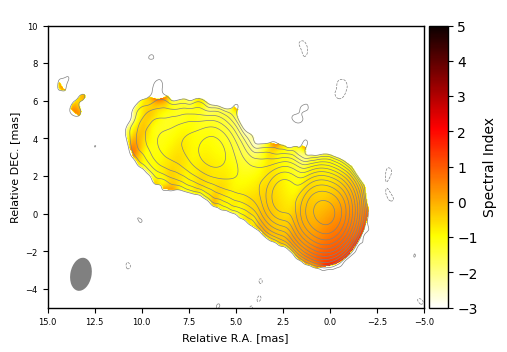

In [7]:
#Now that the alignment has been carried out succesfully, we can also derive spectral index maps and rotation measure maps
#We will do this on the ImageCube object, assuming the maps were aligned correctly

#Let's first convolve them with a common beam
im_cube = im_cube.restore(useDIFMAP=useDIFMAP)

#Define the Frequencies to use for spectral index (will automatically pick the images closest to that frequency
freq1=8 #GHz
freq2=15 #GHz

#get the spectral index map
spix_map=im_cube.get_spectral_index_map(freq1,freq2)

#The spix_map itself is also an ImageCube object and a copy of the higher frequency image with image.spix set to the spectral index map
spix_map.plot(plot_mode="spix",contour=True,xlim=[15,-5],ylim=[-5,10],do_colorbar=True,figsize=(5,4))

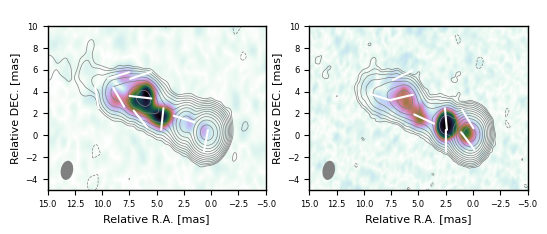

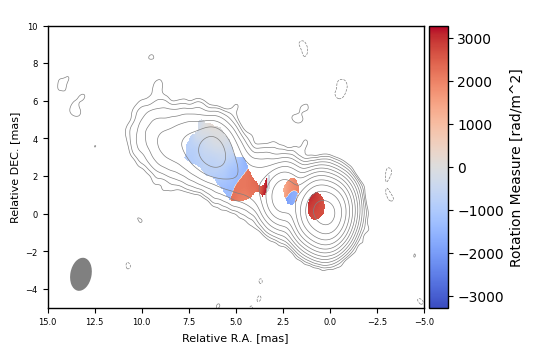

In [8]:
#In a similar fashion we can also derive rotation measure maps, since we loaded polarization information earlier

#Let's look at the polarization again
im_cube.plot(plot_mode="lin_pol",plot_evpa=True,xlim=[15,-5],ylim=[-5,10])

#and now we derive the rotation measure map
rm_map=im_cube.get_rm_map(freq1,freq2,sigma_lim_pol=3,sigma_lim=3)

#plot it:
rm_map.plot(plot_mode="rm",contour=True,xlim=[15,-5],ylim=[-5,10],do_colorbar=True,figsize=(5,4))